In [1]:
import sys
import pandas as pd              # python package for dataframes
import os                        # used to change directory paths
import matplotlib.pyplot as plt  # python package for plotting
import numpy as np
#can't import seaborn
import seaborn as sns #package for plotting
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML  # Make tables pretty
from datetime import datetime
import pandas as pd


## Import Data

In [2]:
path_jp = '//cskma0294/F/Evaluations/JobPath/Python/Analysis/JPOutcomes/'
filename_jp = 'linkedclaims_casuals_2018m04_v2_flat_20160101_with_income_36Vars__7BGM_full_clusters_jp_summary_status.csv'
path_earnings='//cskma0294/F/Evaluations/JobPath/Python/Data/Earnings/'
filename_earnings = 'new_earnings_11jul2018.csv'
data_jp = pd.read_csv(path_jp+filename_jp, encoding= 'utf-8')
data_jp=data_jp[~data_jp['hist_lr_0'].str.contains('C', case=False)]
data_jp=data_jp[data_jp['age']<60]
data_jp=data_jp[data_jp['jp_flag_before_aw']!= 1]
data_jp=data_jp[data_jp['duration_days_0'] > 299]
data_earnings = pd.read_csv(path_earnings+filename_earnings, encoding= 'utf-8')


In [3]:
list(data_earnings)

['RSI_NO',
 'Class_A_Earn2005',
 'Class_A_Earn2006',
 'Class_A_Earn2007',
 'Class_A_Earn2008',
 'Class_A_Earn2009',
 'Class_A_Earn2010',
 'Class_A_Earn2011',
 'Class_A_Earn2012',
 'Class_A_Earn2013',
 'Class_A_Earn2014',
 'Class_A_Earn2015',
 'Class_A_Earn2016',
 'Class_A_Earn2017',
 'Class_S_Earn2005',
 'Class_S_Earn2006',
 'Class_S_Earn2007',
 'Class_S_Earn2008',
 'Class_S_Earn2009',
 'Class_S_Earn2010',
 'Class_S_Earn2011',
 'Class_S_Earn2012',
 'Class_S_Earn2013',
 'Class_S_Earn2014',
 'Class_S_Earn2015',
 'Class_S_Earn2016',
 'Class_S_Earn2017',
 'Class_Other_Earn2005',
 'Class_Other_Earn2006',
 'Class_Other_Earn2007',
 'Class_Other_Earn2008',
 'Class_Other_Earn2009',
 'Class_Other_Earn2010',
 'Class_Other_Earn2011',
 'Class_Other_Earn2012',
 'Class_Other_Earn2013',
 'Class_Other_Earn2014',
 'Class_Other_Earn2015',
 'Class_Other_Earn2016',
 'Class_Other_Earn2017',
 'Class_A_weeks2005',
 'Class_A_weeks2006',
 'Class_A_weeks2007',
 'Class_A_weeks2008',
 'Class_A_weeks2009',
 'Class_

In [4]:
print (data_earnings.shape)
data_earnings.head(2)

(1907397, 53)


,RSI_NO,Class_A_Earn2005,Class_A_Earn2006,Class_A_Earn2007,Class_A_Earn2008,Class_A_Earn2009,Class_A_Earn2010,Class_A_Earn2011,Class_A_Earn2012,Class_A_Earn2013,...,Class_A_weeks2008,Class_A_weeks2009,Class_A_weeks2010,Class_A_weeks2011,Class_A_weeks2012,Class_A_weeks2013,Class_A_weeks2014,Class_A_weeks2015,Class_A_weeks2016,Class_A_weeks2017
0,0006908M,NaN,NaN,NaN,NaN,NaN,12500.0,16866.0,1023.0,NaN,...,NaN,NaN,28.0,46.0,5.0,NaN,NaN,NaN,NaN,NaN
1,0028794W,5572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print (data_jp.shape)
data_jp.head(2)

(110364, 295)


,cluster,ppsn,Amended Referral Status,Cancellationsubcategory,Claim Office Code,Claim Office Name,Date of Cancellation,Date of Interview,Date_paused,Dateresumed,...,StartDate_P16,ada_code_rank_P16,family_flag_rank_P16,hist_lls_P16,hist_lr_P16,lr_flag_P16,marital_status_rank_P16,occupation_rank_P16,status_simple_P16,status_P16
0,2,0099665M,b'nan',b'nan',NaN,NaN,NaN,2016-08-15,NaN,NaN,...,1998-09-16,5,3,UA-UAJPTH-UA,UA,1,2.0,2.0,On Live Register,On Live Register (excluding casual workers) - JA
11,2,0206477C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2005-02-23,5,3,UA,UA,1,2.0,5.0,On Live Register,On Live Register (excluding casual workers) - JA


##  Data merging & manipulation

In [6]:
data_earnings.fillna(0, inplace=True)

col_list2013_2015= ['Class_A_Earn2013', 'Class_A_Earn2014', 'Class_A_Earn2015', 'Class_S_Earn2013', 'Class_S_Earn2014', 
                    'Class_S_Earn2015', 'Class_Other_Earn2013', 'Class_Other_Earn2014','Class_Other_Earn2015']

data_earnings['Sum_2013_2015'] = (data_earnings[col_list2013_2015].sum(axis=1))

col_list2013 = ['Class_A_Earn2013', 'Class_S_Earn2013', 'Class_Other_Earn2013']
col_list2014 = ['Class_A_Earn2014', 'Class_S_Earn2014', 'Class_Other_Earn2014']
col_list2015 = ['Class_A_Earn2015', 'Class_S_Earn2015', 'Class_Other_Earn2015']

data_earnings['Sum_2013'] = (data_earnings[col_list2013].sum(axis=1))
data_earnings['Sum_2014'] = (data_earnings[col_list2014].sum(axis=1))
data_earnings['Sum_2015'] = (data_earnings[col_list2015].sum(axis=1))

col_list_sum_2013_2015 = ['Sum_2013', 'Sum_2014', 'Sum_2015']

data_earnings['mean_2013_2015'] = (data_earnings[col_list_sum_2013_2015].mean(axis=1))


to_keep=['RSI_NO','Sum_2013_2015', 'Sum_2013', 'Sum_2014', 'Sum_2015', 'mean_2013_2015']
data_earnings=data_earnings[to_keep]
data_earnings.isnull().any()
data_earnings.rename(columns={'RSI_NO': 'ppsn'}, inplace=True)
to_keep_jp = ['cluster','ppsn','age',
'duration_days_0',
'sex',
'LM_code_rank_P1',
'occupation_rank_P1',
'ada_code_rank_P1',
'family_flag_rank_P1',
'marital_status_rank_P1',
'LM_code_rank_P2',
'occupation_rank_P2',
'ada_code_rank_P2',
'family_flag_rank_P2',
'marital_status_rank_P2',
'LM_code_rank_P3',
'occupation_rank_P3',
'ada_code_rank_P3',
'family_flag_rank_P3',
'marital_status_rank_P3',
'LM_code_rank_P4',
'occupation_rank_P4',
'ada_code_rank_P4',
'family_flag_rank_P4',
'marital_status_rank_P4',
'LM_code_rank_P5',
'occupation_rank_P5',
'ada_code_rank_P5',
'family_flag_rank_P5',
'marital_status_rank_P5',
'LM_code_rank_P6',
'occupation_rank_P6',
'ada_code_rank_P6',
'family_flag_rank_P6',
'marital_status_rank_P6',
'LM_code_rank_P7',
'occupation_rank_P7',
'ada_code_rank_P7',
'family_flag_rank_P7',
'LM_code_rank_P8',
'occupation_rank_P8',
'ada_code_rank_P8',
'family_flag_rank_P8',
'marital_status_rank_P7',
'marital_status_rank_P8',
'jp_started_P1',
'jp_started_P2',
'jp_started_P3', 'jp_started_P4', 'jp_started_P5', 'jp_started_P6', 
'jp_started_P7', 'jp_started_P8']

data_jp=data_jp[to_keep_jp]
data_jp.loc[:, 'Duration Bands'] = (data_jp['duration_days_0']).apply(lambda x : "0" if x < 365 else ("1"   if x < 730 else ("2" if x < 1095 else ("3"))))
data_jp['Duration Bands']=data_jp['Duration Bands'].astype(int)
data_final=pd.merge(data_jp, data_earnings, on='ppsn', how='left')
data_final.fillna({'Sum_2013_2015':0, 'Sum_2013':0, 'Sum_2014':0, 'Sum_2015':0, 'mean_2013_2015':0, 'Sum_2017':0}, inplace=True)
#data_final=data_final.dropna()

In [7]:
data_final.shape

(110364, 59)

In [ ]:
list(data_final)

In [ ]:
data_final.head()

In [ ]:
data_final.describe()

In [9]:
path_payments ="\\\cskma0294\\F\\Evaluations\\JobPath"
os.chdir(path_payments)
payments = pd.read_csv('ALL_PPSNS_with_payments.csv')


In [10]:
payments.isnull().sum()

ppsn             0
Quarter          0
scheme           0
total_payment    0
dtype: int64

In [11]:
payments['Year'],payments['Q'] = zip(*payments["Quarter"].apply(lambda x: x.split('_')))

In [12]:
payments.head()

,ppsn,Quarter,scheme,total_payment,Year,Q
0,0045405F,2013_Q3,CB,780.0,2013,Q3
1,0045405F,2013_Q3,INTN,3481.4,2013,Q3
2,0045405F,2013_Q4,CB,780.0,2013,Q4
3,0045405F,2013_Q4,INTN,1071.2,2013,Q4
4,0045405F,2013_Q4,UB,1980.2,2013,Q4


In [13]:
#df=payments.groupby(['ppsn', 'Year'])['total_payment'].sum()
df=pd.pivot_table(payments,index=['ppsn', 'Year'], values='total_payment', aggfunc=np.sum)

In [14]:
df=df.reset_index(['Year'])

In [15]:
type(df['Year'])

pandas.core.series.Series

In [17]:
df.isnull().sum()

Year             0
total_payment    0
dtype: int64

In [18]:
df.head()

,Year,total_payment
ppsn,,
0040557D,2015,2491.5
0040557D,2016,11082.7
0040557D,2017,11280.0
0040557D,2018,5632.2
0045405F,2013,8092.8


In [19]:

array=["2013", "2014", "2015"]
df1=df.loc[df['Year'].isin(array)]
#o_credit = dataframe.loc[dataframe['cas_or_ful'].isin(['Casual','Full'])]

In [20]:
df1.isnull().sum()

Year             0
total_payment    0
dtype: int64

In [21]:
df1=pd.pivot_table(df1,index=['ppsn'], values='total_payment', aggfunc=np.mean, dropna = True)

In [22]:
df1.isnull().sum()

total_payment    0
dtype: int64

In [23]:
#df1['total_pay_3yr']=df1.groupby(by=['ppsn'])[["total_payment"]].sum()
#df.groupby(by=['type'])['qty'].sum()
#df1.pivot_table(index='ppsn',columns='total_payment',aggfunc=sum)
df1.columns = ['mean_payment_2013_to_2015']
df1.head()

,mean_payment_2013_to_2015
ppsn,
0040557D,2491.500000
0045405F,5356.400000
0059916K,8209.333333
0070688N,407.300000
0099665M,14300.866667


In [24]:
array=["2017"]
df2017=df.loc[df['Year'].isin(array)]
df2017.columns = ['Year', 'payment_2017']
df2017.head()

,Year,payment_2017
ppsn,,
0040557D,2017,11280.00
0045405F,2017,140.00
0059916K,2017,9920.70
0070688N,2017,3647.57
0099665M,2017,10735.10


### Total payments over three years sorted (and possibly put into banded amounts or percentiles)
#### three-year sum for payments, three-year average for earnings (though called 'sum'), payments for next year, earnings for next year
sort from lowest to highest for earnings, and highest to lowest for payments - assign order expressed in column




In [25]:
df2=df1.reset_index()

In [26]:
df2.head()

,ppsn,mean_payment_2013_to_2015
0,0040557D,2491.500000
1,0045405F,5356.400000
2,0059916K,8209.333333
3,0070688N,407.300000
4,0099665M,14300.866667


In [27]:
df2.isnull().sum()

ppsn                         0
mean_payment_2013_to_2015    0
dtype: int64

In [ ]:
list(df2)

In [28]:
pay_earn_jp1=pd.merge(data_final, df2, on='ppsn', how='left')
pay_earn_jp1.shape

(110364, 60)

In [29]:
pay_earn_jp1.isnull().sum()

cluster                          0
ppsn                             0
age                              0
duration_days_0                  0
sex                              0
LM_code_rank_P1                  0
occupation_rank_P1            8876
ada_code_rank_P1                 0
family_flag_rank_P1              0
marital_status_rank_P1        8877
LM_code_rank_P2                  0
occupation_rank_P2           13139
ada_code_rank_P2                 0
family_flag_rank_P2              0
marital_status_rank_P2       13140
LM_code_rank_P3                  0
occupation_rank_P3           16215
ada_code_rank_P3                 0
family_flag_rank_P3              0
marital_status_rank_P3       16216
LM_code_rank_P4                  0
occupation_rank_P4           17909
ada_code_rank_P4                 0
family_flag_rank_P4              0
marital_status_rank_P4       17910
LM_code_rank_P5                  0
occupation_rank_P5           18134
ada_code_rank_P5                 0
family_flag_rank_P5 

In [30]:
#merged df contains Nan in 
# check with df2.isnull().sum()
#drop with:
pay_earn_jp1 = pay_earn_jp1.dropna(subset=['mean_payment_2013_to_2015'])
pay_earn_jp1.isnull().sum()

cluster                          0
ppsn                             0
age                              0
duration_days_0                  0
sex                              0
LM_code_rank_P1                  0
occupation_rank_P1            8875
ada_code_rank_P1                 0
family_flag_rank_P1              0
marital_status_rank_P1        8875
LM_code_rank_P2                  0
occupation_rank_P2           13138
ada_code_rank_P2                 0
family_flag_rank_P2              0
marital_status_rank_P2       13138
LM_code_rank_P3                  0
occupation_rank_P3           16212
ada_code_rank_P3                 0
family_flag_rank_P3              0
marital_status_rank_P3       16212
LM_code_rank_P4                  0
occupation_rank_P4           17906
ada_code_rank_P4                 0
family_flag_rank_P4              0
marital_status_rank_P4       17906
LM_code_rank_P5                  0
occupation_rank_P5           18130
ada_code_rank_P5                 0
family_flag_rank_P5 

In [31]:
df2017_pay=df2017.reset_index()

In [32]:
df2017_pay.shape

(492307, 3)

In [33]:
#pay_earn_jp1.drop(['total_payment'], axis=1)

In [34]:
pay_earn_jp=pd.merge(pay_earn_jp1, df2017_pay, on='ppsn', how='left')


In [35]:
list(pay_earn_jp)
#pay_earn_jp['total_payment'].describe

['cluster',
 'ppsn',
 'age',
 'duration_days_0',
 'sex',
 'LM_code_rank_P1',
 'occupation_rank_P1',
 'ada_code_rank_P1',
 'family_flag_rank_P1',
 'marital_status_rank_P1',
 'LM_code_rank_P2',
 'occupation_rank_P2',
 'ada_code_rank_P2',
 'family_flag_rank_P2',
 'marital_status_rank_P2',
 'LM_code_rank_P3',
 'occupation_rank_P3',
 'ada_code_rank_P3',
 'family_flag_rank_P3',
 'marital_status_rank_P3',
 'LM_code_rank_P4',
 'occupation_rank_P4',
 'ada_code_rank_P4',
 'family_flag_rank_P4',
 'marital_status_rank_P4',
 'LM_code_rank_P5',
 'occupation_rank_P5',
 'ada_code_rank_P5',
 'family_flag_rank_P5',
 'marital_status_rank_P5',
 'LM_code_rank_P6',
 'occupation_rank_P6',
 'ada_code_rank_P6',
 'family_flag_rank_P6',
 'marital_status_rank_P6',
 'LM_code_rank_P7',
 'occupation_rank_P7',
 'ada_code_rank_P7',
 'family_flag_rank_P7',
 'LM_code_rank_P8',
 'occupation_rank_P8',
 'ada_code_rank_P8',
 'family_flag_rank_P8',
 'marital_status_rank_P7',
 'marital_status_rank_P8',
 'jp_started_P1',
 'jp_

In [36]:
#pd.qcut(pay_earn_jp['total_payment_x', 100).value_counts()

In [37]:
pay_earn_jp['mean_earnings_less_payment_2013_to_2015'] = pay_earn_jp.apply(lambda row: row.mean_2013_2015 - 
                                                                           row.mean_payment_2013_to_2015, axis=1)

In [38]:
pay_earn_jp.head()

,cluster,ppsn,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,...,Duration Bands,Sum_2013_2015,Sum_2013,Sum_2014,Sum_2015,mean_2013_2015,mean_payment_2013_to_2015,Year,payment_2017,mean_earnings_less_payment_2013_to_2015
0,2,0099665M,54.0,6316,1.0,6.0,2.0,5,3,2.0,...,3,0.0,0.0,0.0,0.0,0.0,14300.866667,2017,10735.1,-14300.866667
1,2,0206477C,59.0,3964,2.0,6.0,5.0,5,3,2.0,...,3,0.0,0.0,0.0,0.0,0.0,14092.266667,2017,17179.6,-14092.266667
2,2,0202920T,59.0,1285,2.0,6.0,7.0,4,1,2.0,...,3,0.0,0.0,0.0,0.0,0.0,6829.466667,2017,8445.5,-6829.466667
3,5,0205276K,55.0,1415,2.0,6.0,2.0,6,3,2.0,...,3,0.0,0.0,0.0,0.0,0.0,6649.550000,NaN,NaN,-6649.550000
4,2,0202425J,59.0,2445,2.0,6.0,7.0,5,3,2.0,...,3,0.0,0.0,0.0,0.0,0.0,14125.600000,2017,17472.1,-14125.600000


In [39]:
pay_earn_jp['mean_payment_2013_to_2015'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      100.000000
0.1     4891.856667
0.2     6655.940000
0.3     7801.900000
0.4     8207.233333
0.5     8274.000000
0.6     8695.652000
0.7    10136.780000
0.8    12258.253333
0.9    16391.040000
1.0    47615.633333
Name: mean_payment_2013_to_2015, dtype: float64

In [40]:
pay_earn_jp['payment_2017'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        0.000
0.1     2758.372
0.2     5108.960
0.3     7412.700
0.4     9363.600
0.5    10150.100
0.6    10529.200
0.7    11380.900
0.8    14168.820
0.9    19297.100
1.0    67409.800
Name: payment_2017, dtype: float64

In [41]:
pay_earn_jp['mean_2013_2015'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0         0.000000
0.1         0.000000
0.2         0.000000
0.3         0.000000
0.4         0.000000
0.5         0.000000
0.6         0.000000
0.7       212.000000
0.8      1434.533333
0.9      4253.988000
1.0    329656.000000
Name: mean_2013_2015, dtype: float64

In [42]:
percentile_list = []
for x in range (1, 101):
    percentile_list.append(x/100)
earnings_percentiles = pay_earn_jp['mean_2013_2015'].quantile(percentile_list)
payment_percentiles = pay_earn_jp['mean_payment_2013_to_2015'].quantile(percentile_list)
payment_percentiles_2017 = pay_earn_jp['payment_2017'].quantile(percentile_list)

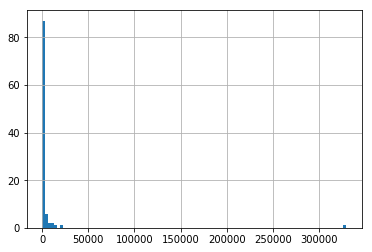

In [43]:
earnings_percentiles.hist(bins=100)

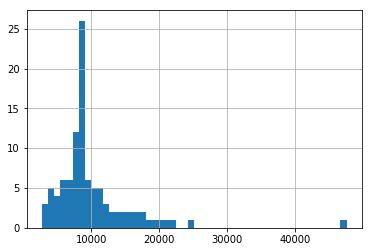

In [44]:
payment_percentiles.hist(bins=50)

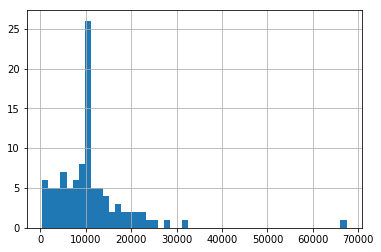

In [45]:
payment_percentiles_2017.hist(bins=50)

In [46]:
#pay_earn_jp['earnings_percentile'] = pay_earn_jp.apply(lambda row: row.Sum_2013_2015, axis=1)

In [47]:
earnings_percentiles

0.01         0.000000
0.02         0.000000
0.03         0.000000
0.04         0.000000
0.05         0.000000
0.06         0.000000
0.07         0.000000
0.08         0.000000
0.09         0.000000
0.10         0.000000
0.11         0.000000
0.12         0.000000
0.13         0.000000
0.14         0.000000
0.15         0.000000
0.16         0.000000
0.17         0.000000
0.18         0.000000
0.19         0.000000
0.20         0.000000
0.21         0.000000
0.22         0.000000
0.23         0.000000
0.24         0.000000
0.25         0.000000
0.26         0.000000
0.27         0.000000
0.28         0.000000
0.29         0.000000
0.30         0.000000
            ...      
0.71       295.990400
0.72       372.400000
0.73       465.333333
0.74       556.803733
0.75       672.368333
0.76       786.666667
0.77       928.453267
0.78      1079.747733
0.79      1256.726667
0.80      1434.533333
0.81      1623.333333
0.82      1833.333333
0.83      2067.114667
0.84      2317.042933
0.85      

In [48]:
pay_earn_jp['payment_2017'].max()

67409.8

In [49]:
pay_earn_jp_P1=pay_earn_jp.loc[pay_earn_jp['jp_started_P1']==1]

#pay_earn_jp_P1_0 = pay_earn_jp_P1.loc[pay_earn_jp['cluster']==0]

In [50]:
pay_earn_jp_not_P1=pay_earn_jp.loc[pay_earn_jp['jp_started_P1']==0]

In [51]:
import math

get_composite_value = lambda row: int(round(row.mean_2013_2015,0)*math.pow(10, 11) +
                                      round(row.mean_payment_2013_to_2015,0)*math.pow(10, 5) +
                                      round(row.duration_days_0,0))
col = pay_earn_jp_P1.apply(get_composite_value, axis=1)
pay_earn_jp_P1 = pay_earn_jp_P1.assign(cut_value=col.values)
pay_earn_jp_P1.sort_values(by=['cut_value'], ascending = [True]).head()


,cluster,ppsn,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,...,Sum_2013_2015,Sum_2013,Sum_2014,Sum_2015,mean_2013_2015,mean_payment_2013_to_2015,Year,payment_2017,mean_earnings_less_payment_2013_to_2015,cut_value
78929,2,7167866L,36.0,3384,1.0,6.0,3.0,5,4,1.0,...,0.0,0.0,0.0,0.0,0.0,643.833333,2017,509.5,-643.833333,64403384
32067,5,5775190C,56.0,357,1.0,6.0,4.0,2,1,1.0,...,0.0,0.0,0.0,0.0,0.0,704.700000,2017,178.0,-704.700000,70500357
106888,2,3997865F,46.0,345,2.0,6.0,3.0,6,3,1.0,...,0.0,0.0,0.0,0.0,0.0,846.600000,NaN,NaN,-846.600000,84700345
49678,2,4471896Q,40.0,724,1.0,6.0,2.0,5,4,2.0,...,0.0,0.0,0.0,0.0,0.0,881.300000,2017,612.4,-881.300000,88100724
26310,2,3620774T,50.0,2213,2.0,6.0,4.0,6,3,2.0,...,0.0,0.0,0.0,0.0,0.0,1018.666667,2017,21695.6,-1018.666667,101902213


In [52]:
ser, bins = pd.qcut(pay_earn_jp_P1['cut_value'], 100, retbins=True, labels=False)
bins.shape

(101,)

In [53]:
# Adjustment to make sure that the smallest value is included in the smallest bin
bins[0] = bins[0] - 1

In [54]:
pay_earn_jp_P1['bucket_P1'] = pd.cut(pay_earn_jp_P1.cut_value, bins, labels=False)
pay_earn_jp_P1.head()

,cluster,ppsn,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,...,Sum_2013,Sum_2014,Sum_2015,mean_2013_2015,mean_payment_2013_to_2015,Year,payment_2017,mean_earnings_less_payment_2013_to_2015,cut_value,bucket_P1
15,1,0524876Q,55.0,512,1.0,6.0,6.0,1,1,1.0,...,6925.0,2876.0,0.0,3267.000000,6299.100000,2017,10995.1,-3032.100000,326700629900512,92
52,2,0546004E,30.0,997,2.0,6.0,5.0,5,4,2.0,...,0.0,0.0,0.0,0.000000,17865.733333,2017,27967.4,-17865.733333,1786600997,65
55,1,0524066E,30.0,352,2.0,6.0,3.0,6,3,2.0,...,8286.0,0.0,0.0,2762.000000,4417.300000,2017,6779.8,-1655.300000,276200441700352,90
99,1,0714417P,42.0,716,1.0,6.0,6.0,4,2,2.0,...,11112.0,0.0,0.0,3704.000000,12173.066667,2017,16719.3,-8469.066667,370401217300716,93
109,1,0693900I,40.0,329,1.0,6.0,9.0,2,1,2.0,...,9802.0,4207.0,0.0,4669.666667,6845.500000,NaN,NaN,-2175.833333,467000684600329,94


In [55]:
pay_earn_jp_P1['bucket_P1'].value_counts()

99    69
90    69
70    69
58    69
54    69
38    69
22    69
6     69
93    69
77    69
61    69
45    69
41    69
29    69
25    69
9     69
96    69
88    69
80    69
64    69
48    69
36    69
32    69
16    69
12    69
74    69
0     69
51    69
67    69
19    69
      ..
15    68
42    68
46    68
11    68
43    68
7     68
62    68
66    68
98    68
78    68
82    68
18    68
97    68
10    68
2     68
86    68
49    68
53    68
57    68
65    68
69    68
73    68
31    68
81    68
85    68
27    68
95    68
24    67
89    67
37    67
Name: bucket_P1, Length: 100, dtype: int64

In [56]:
pay_earn_jp_not_P1.isnull().sum()

cluster                                        0
ppsn                                           0
age                                            0
duration_days_0                                0
sex                                            0
LM_code_rank_P1                                0
occupation_rank_P1                          8665
ada_code_rank_P1                               0
family_flag_rank_P1                            0
marital_status_rank_P1                      8665
LM_code_rank_P2                                0
occupation_rank_P2                         12667
ada_code_rank_P2                               0
family_flag_rank_P2                            0
marital_status_rank_P2                     12667
LM_code_rank_P3                                0
occupation_rank_P3                         15657
ada_code_rank_P3                               0
family_flag_rank_P3                            0
marital_status_rank_P3                     15657
LM_code_rank_P4     

In [57]:
col = pay_earn_jp_not_P1.apply(get_composite_value, axis=1)
pay_earn_jp_not_P1 = pay_earn_jp_not_P1.assign(cut_value=col.values)

pay_earn_jp_not_P1['bucket_P1'] = pd.cut(pay_earn_jp_not_P1.cut_value, bins, labels=False)
pay_earn_jp_not_P1.head()

,cluster,ppsn,age,duration_days_0,sex,LM_code_rank_P1,occupation_rank_P1,ada_code_rank_P1,family_flag_rank_P1,marital_status_rank_P1,...,Sum_2013,Sum_2014,Sum_2015,mean_2013_2015,mean_payment_2013_to_2015,Year,payment_2017,mean_earnings_less_payment_2013_to_2015,cut_value,bucket_P1
0,2,0099665M,54.0,6316,1.0,6.0,2.0,5,3,2.0,...,0.0,0.0,0.0,0.0,14300.866667,2017,10735.1,-14300.866667,1430106316,59.0
1,2,0206477C,59.0,3964,2.0,6.0,5.0,5,3,2.0,...,0.0,0.0,0.0,0.0,14092.266667,2017,17179.6,-14092.266667,1409203964,58.0
2,2,0202920T,59.0,1285,2.0,6.0,7.0,4,1,2.0,...,0.0,0.0,0.0,0.0,6829.466667,2017,8445.5,-6829.466667,682901285,7.0
3,5,0205276K,55.0,1415,2.0,6.0,2.0,6,3,2.0,...,0.0,0.0,0.0,0.0,6649.550000,NaN,NaN,-6649.550000,665001415,6.0
4,2,0202425J,59.0,2445,2.0,6.0,7.0,5,3,2.0,...,0.0,0.0,0.0,0.0,14125.600000,2017,17472.1,-14125.600000,1412602445,58.0


In [58]:
pay_earn_jp_not_P1['bucket_P1'].value_counts()

99.0    3792
2.0     1745
97.0    1586
98.0    1518
96.0    1476
4.0     1441
0.0     1431
93.0    1423
3.0     1379
14.0    1352
1.0     1336
95.0    1328
92.0    1320
87.0    1256
79.0    1212
94.0    1202
85.0    1192
5.0     1184
88.0    1169
76.0    1156
86.0    1155
74.0    1153
80.0    1106
10.0    1099
90.0    1087
91.0    1062
32.0    1050
51.0    1048
43.0    1041
78.0    1039
        ... 
27.0     896
35.0     892
67.0     892
18.0     888
19.0     883
89.0     882
41.0     881
29.0     878
8.0      876
63.0     855
82.0     851
39.0     850
57.0     850
55.0     837
26.0     833
20.0     826
17.0     805
12.0     803
47.0     801
60.0     791
7.0      774
28.0     771
30.0     767
70.0     761
58.0     757
9.0      753
25.0     719
24.0     687
36.0     644
21.0     612
Name: bucket_P1, Length: 100, dtype: int64

# Need to fix the below. Working above.

In [59]:
min_e = []
min_p = []
min_d = []
max_e = []
max_p = []
max_d = []
bucket_count = []
bucket_count_P1 = pay_earn_jp_P1['bucket_P1'].value_counts()
for i in range (1, 101):
    min_e.append(pay_earn_jp_P1.loc[pay_earn_jp_P1['bucket_P1']==i]['mean_2013_2015'].min())
    min_p.append(pay_earn_jp_P1.loc[pay_earn_jp_P1['bucket_P1']==i]['mean_payment_2013_to_2015'].min())
    min_d.append(pay_earn_jp_P1.loc[pay_earn_jp_P1['bucket_P1']==i]['duration_days_0'].min())
    max_e.append(pay_earn_jp_P1.loc[pay_earn_jp_P1['bucket_P1']==i]['mean_2013_2015'].max())
    max_p.append(pay_earn_jp_P1.loc[pay_earn_jp_P1['bucket_P1']==i]['mean_payment_2013_to_2015'].max())
    max_d.append(pay_earn_jp_P1.loc[pay_earn_jp_P1['bucket_P1']==i]['duration_days_0'].max())
    bucket_count.append(bucket_count_P1[i])
P1 = pd.DataFrame()
P1['centile'] = list(range(1, 101))
P1['mean_earnings_min'] = min_e
P1['mean_earnings_max'] = max_e
P1['mean_payment_min'] = min_p
P1['mean_payment_max'] = max_p
P1['duration_min'] = min_d
P1['duration_max'] = max_d
P1['bucket_count'] = bucket_count

P1

KeyError: 100

## P - Values of variables

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

x=['cluster',
'age',
'Duration Bands',
'sex',
]
y=['jp_started_P1']
X=data_final[x]
Y=data_final[y]

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

## Variable importance by logistic

In [ ]:
import numpy as np    
from sklearn.linear_model import LogisticRegression

x=['cluster',
'age',
'Duration Bands',
'sex',
]
y=['jp_started_P1']
X=data_final[x]
Y=data_final[y]

m = LogisticRegression()
m.fit(X/ np.std(X, 0), Y)

# The estimated coefficients will all be around 1:
print(m.coef_)



## Variable importance by Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
x=['cluster',
   'age',
'Duration Bands',
'sex',
'LM_code_rank_P1',
'occupation_rank_P1',
'ada_code_rank_P1',
'family_flag_rank_P1',
'marital_status_rank_P1','Sum_2012-2015']
y=['jp_started_P1']

X=data_final[x]
Y=data_final[y]
model.fit(X,Y)
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X)), reverse=True)
print (sorted_feature_importance)

## Propensity Scores Calculation for 8 quarters (Logistic Regression)

In [ ]:
appended_data = []
for i in range(1,9):
    #variable initialization 
    jp_started = 'jp_started_P'+str(i)
    data_jp_i = 'data_jp_i'+str(i)
    data_jp_i = data_final[(data_final[jp_started] == 1) | (data_final[jp_started] == 0) ]
    LM_code_rank = 'LM_code_rank_P'+str(i)
    age = 'age'
    sex = 'sex'
    ada_code_rank = 'ada_code_rank_P'+str(i)
    family_flag_rank = 'family_flag_rank_P'+str(i)
    marital_status_rank = 'marital_status_rank_P'+str(i)
    Propensity='Propensity'+str(i)
    Probability='Probability'+str(i)
    # propensity score calculation
    from sklearn.linear_model import LogisticRegression
    names = [age,'Duration Bands',sex]
    propensity = LogisticRegression()
    propensity = propensity.fit(data_jp_i[names], data_jp_i[jp_started])
    pscore = propensity.predict_proba(data_jp_i[names])[:,1] # The predicted propensities by the model
    data_jp_i[Propensity] = pscore
    data_jp_i[Probability] = 1-pscore
    keep = [Propensity,Probability, age, sex,jp_started]
    data_jp_i = data_jp_i[keep]
    appended_data.append(data_jp_i)
    
appended_data = pd.concat(appended_data, axis=1)

In [ ]:
appended_data.head()

In [ ]:
appended_data_final = []
# Common attributes
keep1 = ['cluster','ppsn','age','sex','Duration Bands']
df = data_final[(data_final[jp_started] == 1) | (data_final[jp_started] == 0) ]
df = df[keep1]
appended_data_final = pd.concat([df,appended_data], axis=1)
appended_data_final.to_csv('propensity_scores.csv')

## Propensity Scores Calculation for 1 quarter (Random Forest)

In [ ]:
non_treated_df = data_final[data_final.jp_started_P1 == 0]
treated_df = data_final[data_final.jp_started_P1 == 1]
data_jp=pd.concat([treated_df,non_treated_df])
data_jp=data_jp.reset_index()

from sklearn.ensemble import RandomForestRegressor

names2 = ['Sum_2012-2015', 'age',  'occupation_rank_P1','Duration Bands','ada_code_rank_P1', 'cluster']

propensity2 = RandomForestRegressor()

propensity2 = propensity2.fit(data_jp[names2], data_jp.jp_started_P1)
pscore2 = propensity2.predict(data_jp[names2]) # The predicted propensities by the model
print(pscore2[:5])

data_jp['Propensity_RF'] = pscore2

## Propensity Score distribution Graphically 

In [ ]:
import matplotlib.pyplot as plt


ax1 = plt.subplot2grid((1,1), (0,0))


data_jp.groupby("jp_started_P1").Propensity.plot(kind='hist', ax=ax1,alpha=0.6,bins = np.arange(min(data_jp['Propensity']),max(data_jp['Propensity']),.05))
data_jp.groupby("jp_started_P1").Propensity.plot(kind='kde', ax=ax1,secondary_y=True,legend = True)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


unique_vals = data_jp['jp_started_P1'].unique()
print(unique_vals)

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data_jp.loc[data_jp['jp_started_P1'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target[['Propensity']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})


In [ ]:
data_jp.Propensity.hist(by=data_jp.jp_started_P1)

In [ ]:
data_jp.Propensity_RF.hist(by=data_jp.jp_started_P1)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


unique_vals = data_jp['jp_started_P1'].unique()
print(unique_vals)

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data_jp.loc[data_jp['jp_started_P1'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target[['Propensity_RF']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

## Matching of Propensity score between Treatment & Control Group

In [ ]:
def Match(groups, propensity, caliper = 0.05):
    
    # Check inputs
    if any(propensity <0) or any(propensity >1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<caliper<1):
        raise ValueError('Caliper must be between 0 and 1')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups')


    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups.sum(); N2 = N-N1
    g1, g2 = propensity[groups == 1], (propensity[groups == 0])

    # Check if treatment groups got flipped - treatment (coded 1) should be the smaller
    if N1 > N2:
       N1, N2, g1, g2 = N2, N1, g2, g1 

    
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = pd.Series(np.empty(N1))
    matches[:] = np.NAN
    for m in morder:
        dist = abs(g1[m]- g2)
        if dist.min() <= caliper:
            matches[m] = dist.idxmin()
            g2 = g2.drop(matches[m])
    return (matches)

In [ ]:
#Displaying propensity scores side by side for both the groups

stuff = Match(data_jp.jp_started_P1, data_jp.Propensity)
g1, g2 = data_jp.Propensity[data_jp.jp_started_P1==1], data_jp.Propensity[data_jp.jp_started_P1==0]
stuff = stuff.dropna()
stuff = stuff.astype(int)

In [ ]:
line = []
line1 =[]
for i, v in stuff.iteritems():
    
    #Logistic
    line=[g1[i],g2[v],data_jp['ppsn'][i],data_jp['Duration Bands'][i],data_jp.cluster[i],data_jp.LM_code_rank_P1[i],data_jp.marital_status_rank_P1[i],data_jp.family_flag_rank_P1[i],data_jp['Sum_2012-2015'][i],data_jp['ppsn'][v],data_jp['Duration Bands'][v],data_jp.cluster[v],data_jp.LM_code_rank_P1[v],data_jp.marital_status_rank_P1[v],data_jp.family_flag_rank_P1[v],data_jp['Sum_2012-2015'][v]]
    #Random 
    #line=[g1[i],g2[v],data_jp['ppsn'][i],data_jp['Duration Bands'][i],data_jp.cluster[i],data_jp.age[i],data_jp.ada_code_rank_P1[i],data_jp.occupation_rank_P1[i],data_jp['Sum_2012-2015'][i],data_jp['ppsn'][v],data_jp['Duration Bands'][v],data_jp.cluster[v],data_jp.age[v],data_jp.ada_code_rank_P1[v],data_jp.occupation_rank_P1[v],data_jp['Sum_2012-2015'][v]]
    
    line1.append(line)
    
df=pd.DataFrame(line1)

In [ ]:
#df.to_csv('propensity_Random.csv')
df.to_csv('propensity_logistic.csv')

### Description of outcome, by cluster

In [ ]:
list(data_jp)

In [ ]:
print(' ')
# Crosstab of outcomes, raw numbers
tab_lab_detoutcome_countsP1 = pd.crosstab(index = data_jp['status_simple_P1'], 
                                      columns = data_jp['cluster'], 
                                      margins = True).round(2)

display(tab_lab_detoutcome_countsP1)
# Select totals columns 
# totals = tab_lab_detoutcome_counts['All'].map(lambda x: "{:,}".format(x))

# # Cross tab of outcomes, normalised for each nationality group.
tab_lab_detoutcome_freq1 = pd.crosstab(index = data_jp['status_simple_P1'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq1)


tab_lab_detoutcome_freq2 = pd.crosstab(index = data_jp['status_simple_P2'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq2)

tab_lab_detoutcome_freq3 = pd.crosstab(index = data_jp['status_simple_P3'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq3)

tab_lab_detoutcome_freq4 = pd.crosstab(index = data_jp['status_simple_P4'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq4)

tab_lab_detoutcome_freq5 = pd.crosstab(index = data_jp['status_simple_P5'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq5)

tab_lab_detoutcome_freq6 = pd.crosstab(index = data_jp['status_simple_P6'], 
                                       columns = data_jp['cluster'], 
                                       normalize = 'columns').round(2)
                                       
display(tab_lab_detoutcome_freq6)


# # Reorder columns
# tab_lab_detoutcome_freq = tab_lab_detoutcome_freq[column_order]

# # Create a row containing totals
# tab_lab_detoutcome_freq.loc['All'] = tab_lab_detoutcome_freq.sum().round(1)

# # Join totals and frequency tables
# joined_table = pd.concat([tab_lab_detoutcome_freq, totals], axis = 1)   

# # rename rows and columns
# joined_table = joined_table.rename(columns = {'All' : 'N'})
# joined_table = joined_table.rename({'All' : 'All outcomes'})

# # output
# display(joined_table)

# # spacing for output
# print(color.BOLD + 'Table 18: ' + color.END +' Labour market outcomes by nationality group' )
# print('(Source: DEASP Administrative Data)')


print(' ')
in_LR =  data_jp.loc[ data_jp['status_simple_P2'] == 'On Live Register']


in_LR_by_sex = pd.crosstab(index = in_LR['sex'], 
                                      columns = in_LR['cluster'],
                                      margins = True).round(2)


display(in_LR_by_sex)
#in_emp_by_age = in_emp_by_age[column_order]
#in_LR_by_sex['Total'] = in_LR_by_sex.sum(axis =1)


# display(in_emp_by_age.applymap(lambda x: "{:,}".format(x)))
# print(color.BOLD + 'Table X: ' + color.END)


# display(claims_by_age_nat.astype(int).applymap(lambda x: "{:,}".format(x)))
# print(color.BOLD + 'Table X: ' + color.END)

#proportion_employment = in_emp_by_age.div(claims_by_age_nat).mul(100).round(2)

#display(proportion_employment[:-1])
